In [30]:
import re
import os
import sys
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def find_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith("Banking77Classification.json"):
                yield os.path.join(root, file)

def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)

In [31]:
results = []

for i in find_files("results"):
    dim = re.search(r'dim=(\d+)', i).group(1)
    data = load_json(i)["scores"]["test"][0]
    results.append({'dim': int(dim), 'acc': data['accuracy'], 'f1': data['f1']})

results = pd.DataFrame(results).set_index('dim').sort_index()

<Axes: title={'center': 'Banking77 Classification with reduced dimensions (baseline dim=384)'}, xlabel='dim'>

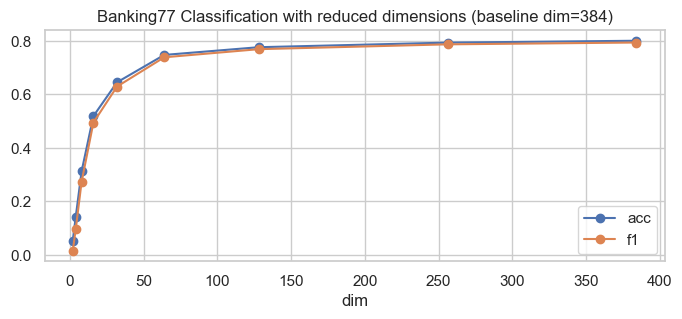

In [36]:
pd.DataFrame(results).plot(marker='o', linestyle='-', figsize=(8, 3), title='Banking77 Classification with reduced dimensions (baseline dim=384)')
# plt.yscale('log')